In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def is_square(N):
    return round(N**0.5)**2 == N

def reps_sum_squares(N):
    resp = []
    if is_square(N/2):
        max_x = round((N/2)**0.5)

    else:
        max_x = int((N/2)**0.5)

    for x in range(0, max_x + 1):
        y_squared = N - x**2
        if is_square(y_squared):
            y = round(y_squared**0.5)

            resp.append((x,y))

    return resp

In [3]:
reps_sum_squares(1105)

[(4, 33), (9, 32), (12, 31), (23, 24)]

In [4]:
x = np.array([1, 1, 1])
y = np.array([2, 2, 2])
z = np.array([3, 3, 3])
vstacked = np.vstack((x, y, z))
print(vstacked)

[[1 1 1]
 [2 2 2]
 [3 3 3]]


In [5]:
hstacked = np.hstack((x, y, z))
print(hstacked)

[1 1 1 2 2 2 3 3 3]


In [6]:
A = np.ones((2,2))
B = 2*np.ones((2, 2))
C = 3*np.ones((2, 2))
D = 4*np.ones((2, 2))
A_B = np.hstack((A, B))
print(A_B)

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]]


In [7]:
C_D = np.hstack((C, D))
print(C_D)

[[3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [8]:
T = np.vstack((A_B, C_D))
print(T)

[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


In [9]:
from numpy.linalg import matrix_power as mpow

In [10]:
A = np.array([[3, 1], [2, -1]])
B = np.array([[2, -2], [5, 1]])

In [11]:
mpow(A, 3)

array([[37,  9],
       [18,  1]])

In [12]:
A@B

array([[11, -5],
       [-1, -5]])

In [13]:
A@A@A

array([[37,  9],
       [18,  1]])

In [14]:
arr = np.array([8, -2, 4, 7, -3])
print(arr)

[ 8 -2  4  7 -3]


In [15]:
np.mean(arr)

2.8

In [16]:
m = np.sum(arr)/arr.size
print(m)

2.8


In [17]:
max_i = np.argmax(arr)
print(max_i)

0


In [18]:
np.max(arr)

8

In [19]:
arr[max_i]

8

In [20]:
M = np.array([[2, 4, 2], [2, 1, 1], [3, 2, 0], [0, 6, 2]])
print(M)

[[2 4 2]
 [2 1 1]
 [3 2 0]
 [0 6 2]]


In [21]:
np.sum(M, axis=0)

array([ 7, 13,  5])

In [22]:
np.sum(M, axis=1)

array([8, 4, 5, 8])

In [23]:
np.random.rand(3)

array([0.51007581, 0.90159506, 0.3403946 ])

In [24]:
np.random.rand(2, 4)

array([[0.76977452, 0.45222096, 0.62020794, 0.57281376],
       [0.28730764, 0.07329525, 0.82405796, 0.42560037]])

In [25]:
def factorial(N):
    prod = 1
    for i in range(2, N+1):
        prod *= i

    return prod

In [26]:
def cos_taylor(N, x):
    y = np.zeros(len(x))
    for j in range(0, N+1):
        y += ((-1)**j * (x)**(2*j)/ factorial(2*j))
    return y

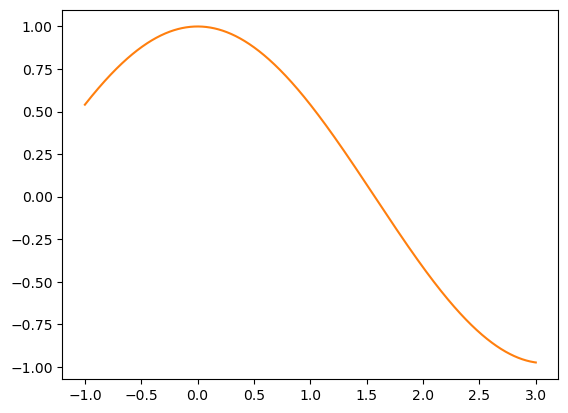

In [27]:
x = np.linspace(-1, 3, 1000)
degree4_taylor = cos_taylor(4, x)
plt.plot(x, degree4_taylor, c = 'C1', label = 'Degree 4')


In [28]:
from time import time

In [31]:
def bisection(f, a, b, N):
    if f(a)*f(b) >= 0:
        raise ValueError("Bisection method fails")

    a_n = a ; b_n = b

    for n in range(1, N+1):
        m_n = (a_n+b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n ; b_n = m_n

        elif f(b_n)*f_m_n < 0:
            a_n = m_n; b_n = b_n

        elif f_m_n == 0:
            print("Found exact solution")
            return m_n

        else:
            print("Bisction method fails")
            return None

    return (a_n+b_n)/2

In [32]:
f = lambda x: x
bisection(f, 0, 1, 100)

ValueError: Bisection method fails

In [33]:
f = lambda x : x**2 - x -1
approx_phi = bisection(f, 1, 2, 25)

In [34]:
def secant(f, a, b, N):
    if f(a)*f(b) >= 0:
        raise Exception("Secant method fails")

    for n in range(1, N+1):
        x0 = a - f(a)*(b-a)/(f(b)-f(a))
        if f(x0) == 0:
            return x0

        elif f(a)*f(x0) < 0:
            b = x0
        
        elif f(b)*f(x0) < 0:
            a = x0

        else:
            raise Exception("Secant method fails at {} iterations".format(n))

    return a - f(a)*(b-a)/(f(b)-f(a))

In [35]:
p = lambda x: x**3 - x**2 - 1

In [36]:
print(p(1))

-1


In [37]:
approx = secant(p, 1, 2, 20)
print(approx)

1.4655712311394433


In [38]:
def newton(f, Df, x0, epsilon, max_iter):
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print("Found solution after", n, "iterations.")
            return xn

        Dfxn = Df(xn)
        if DFxn == 0:
            print("Zero derivative. No solution found.")
            return None

        xn -= fxn/Dfxn

    print("Exceed maximum iterations. No solution found.")
    return None

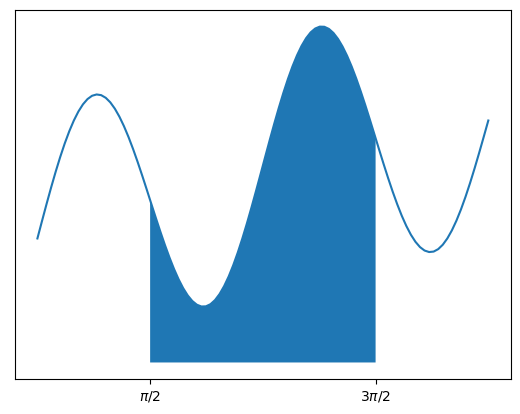

In [39]:
f = lambda x: np.sin(0.2*x) + np.sin(2*x) + 1

x = np.linspace(0, 2*np.pi, 100)
y = f(x)
plt.plot(x, y)

X = np.linspace(np.pi/2, 3*np.pi/2, 100)
Y = f(X)
plt.fill_between(X, Y)
plt.xticks([np.pi/2, 3*np.pi/2], ["$\pi/2 $", "$ 3\pi/2$"]) ; plt.yticks([])
plt.show()

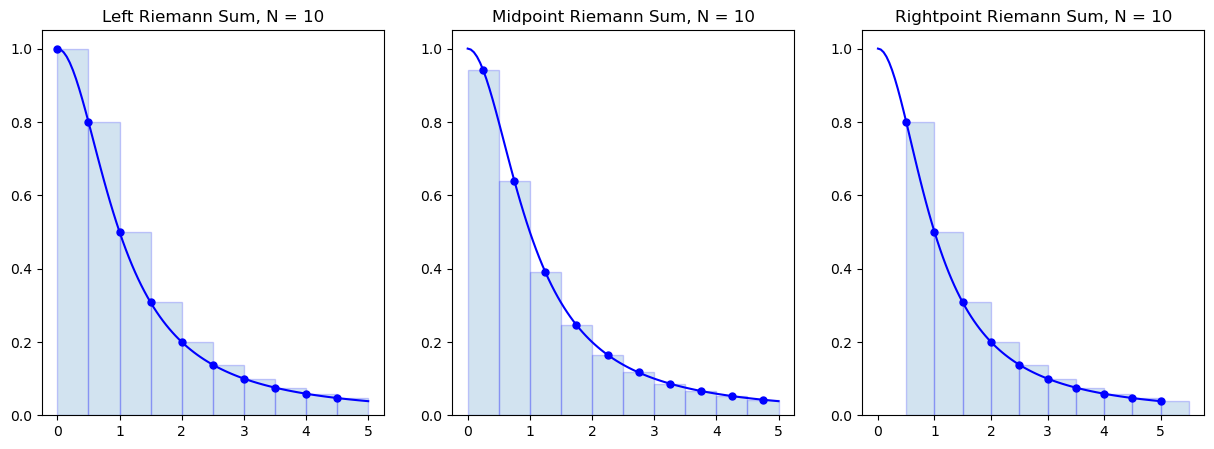

In [43]:
f = lambda x : 1/(1+x**2)
a = 0 ; b = 5 ; N =10
n = 10

x = np.linspace(a, b, N+1)
y = f(x)

X = np.linspace(a, b, n*N+1)
Y = f(X)

plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.plot(X, Y, 'b')
x_left = x[:-1] ; y_left = y[:-1]
plt.plot(x_left, y_left, 'b.', markersize = 10)
plt.bar(x_left, y_left, width=(b-a)/N, alpha=0.2, align='edge', edgecolor='b')
plt.title("Left Riemann Sum, N = {}".format(N))

plt.subplot(1, 3, 2)
plt.plot(X, Y, 'b')
x_mid = (x[:-1]+x[1:])/2 ; y_mid = f(x_mid)
plt.plot(x_mid, y_mid, 'b.', markersize=10)
plt.bar(x_mid, y_mid, width=(b-a)/N, alpha=0.2, edgecolor='b')
plt.title("Midpoint Riemann Sum, N = {}".format(N))

plt.subplot(1, 3, 3)
plt.plot(X, Y, 'b')
x_right = x[1:] 
y_right = y[1:]
plt.plot(x_right, y_right, 'b.', markersize=10)
plt.bar(x_right, y_right, width=(b-a)/N, align='edge', alpha=0.2, edgecolor='b')
plt.title("Rightpoint Riemann Sum, N = {}".format(N))

plt.show()

In [44]:
dx = (b-a)/N
x_left = np.linspace(a, b-dx, N)
x_midpoint = np.linspace(dx/2, b-dx/2, N)
x_right = np.linspace(dx, b, N)

print("Partition with", N, "subintervals.")
left_riemann_sum = np.sum(f(x_left)*dx)
print("Left Riemann sum:", left_riemann_sum)
# print(x_left)

midpoint_riemann_sum = np.sum(f(x_midpoint) * dx)
print("Midpoint Riemann Sum:", midpoint_riemann_sum)
# print(x_midpoint)

right_riemann_sum = np.sum(f(x_right)*dx)
print("Right Riemann Sum:", right_riemann_sum)
# print(x_right)

Partition with 10 subintervals.
Left Riemann sum: 1.613488696614725
Midpoint Riemann Sum: 1.373543428316664
Right Riemann Sum: 1.1327194658454942


In [45]:
def riemann_sum(f, a, b, N, method='midpoint'):
    dx = (b-a)/N
    x = np.linspace(a, b, N+1)

    if method == "left":
        x_left = x[:-1]
        return np.sum(f(x_left)*dx)

    elif method == "right":
        x_right = x[1:]
        return np.sum(f(x_right)*dx)

    elif method == "midpoint":
        x_mid = (x[:-1]+x[1:])/2
        return np.sum(f(x_mid)*dx)

    else:
        raise ValueError("Type 'left', 'right', or 'midpoint'.")

In [46]:
riemann_sum(np.sin, 0, np.pi/2, 100)

1.0000102809119054

In [47]:
riemann_sum(np.sin, 0, np.pi/2, 100, 'right')

1.007833419873582

In [48]:
riemann_sum(np.sin, 0, np.pi/2, 100, 'left')

0.992125456605633